In [9]:
!pip install tensorflow

In [10]:
import os
import zipfile

In [11]:
print(os.listdir(os.getcwd()))


['.gitignore', 'Pneumonia.ipynb', 'pneumonia_detection_model.h5']


In [12]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other




  0%|          | 0.00/2.29G [00:00<?, ?B/s]
  0%|          | 1.00M/2.29G [00:00<38:39, 1.06MB/s]
  0%|          | 2.00M/2.29G [00:01<20:56, 1.96MB/s]
  0%|          | 3.00M/2.29G [00:01<16:07, 2.54MB/s]
  0%|          | 4.00M/2.29G [00:01<12:19, 3.33MB/s]
  0%|          | 5.00M/2.29G [00:01<11:37, 3.53MB/s]
  0%|          | 6.00M/2.29G [00:02<14:15, 2.87MB/s]
  0%|          | 7.00M/2.29G [00:02<17:01, 2.41MB/s]
  0%|          | 8.00M/2.29G [00:03<14:54, 2.75MB/s]
  0%|          | 9.00M/2.29G [00:03<13:23, 3.05MB/s]
  0%|          | 11.0M/2.29G [00:03<09:07, 4.48MB/s]
  1%|          | 12.0M/2.29G [00:03<08:44, 4.67MB/s]
  1%|          | 13.0M/2.29G [00:04<08:04, 5.05MB/s]
  1%|          | 14.0M/2.29G [00:04<07:16, 5.61MB/s]
  1%|          | 15.0M/2.29G [00:04<06:52, 5.93MB/s]
  1%|          | 16.0M/2.29G [00:04<06:32, 6.24MB/s]
  1%|          | 17.0M/2.29G [00:04<06:16, 6.49MB/s]
  1%|          | 18.0M/2.29G [00:04<05:59, 6.79MB/s]
  1%|          | 19.0M/2.29G [00:04<06:23, 6.38MB/s]
 

In [4]:
with zipfile.ZipFile("chest-xray-pneumonia.zip", 'r') as zip_ref:
    zip_ref.extractall("data")  # Giải nén vào thư mục 'data'

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
print("TensorFlow version:", tf.__version__)

# Kiểm tra danh sách thiết bị GPU
gpus = tf.config.list_physical_devices('GPU')
print("GPU detected:", gpus)

TensorFlow version: 2.18.0
GPU detected: []


In [13]:
import os
print(os.getcwd())

d:\PredictPneumonia


In [14]:
print(os.listdir(os.getcwd()))

['chest-xray-pneumonia.zip', 'data', 'Pneumonia.ipynb', 'pneumonia_detection_model.h5']


In [17]:
# Đường dẫn đến các thư mục
train_dir = "data/chest_xray/train"
test_dir = "data/chest_xray/test"
val_dir = "data/chest_xray/val"

# Tạo dataset từ thư mục
batch_size = 32
img_height = 150
img_width = 150

In [18]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="binary",  # Gắn nhãn binary: 0 (normal), 1 (pneumonia)
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="binary",
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="binary",
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [19]:
X_train = np.concatenate([x.numpy() for x, _ in train_ds], axis=0)
y_train = np.concatenate([y.numpy() for _, y in train_ds], axis=0)

X_val = np.concatenate([x.numpy() for x, _ in val_ds], axis=0)
y_val = np.concatenate([y.numpy() for _, y in val_ds], axis=0)

X_test = np.concatenate([x.numpy() for x, _ in test_ds], axis=0)
y_test = np.concatenate([y.numpy() for _, y in test_ds], axis=0)

In [20]:
np.save("X_train.npy", np.concatenate([x.numpy() for x, _ in train_ds], axis=0))
np.save("y_train.npy", np.concatenate([y.numpy() for _, y in train_ds], axis=0))

np.save("X_val.npy", np.concatenate([x.numpy() for x, _ in val_ds], axis=0))
np.save("y_val.npy", np.concatenate([y.numpy() for _, y in val_ds], axis=0))

np.save("X_test.npy", np.concatenate([x.numpy() for x, _ in test_ds], axis=0))
np.save("y_test.npy", np.concatenate([y.numpy() for _, y in test_ds], axis=0))

In [21]:
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")

X_val = np.load("X_val.npy")
y_val = np.load("y_val.npy")

X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

In [22]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_train shape: {X_val.shape}")
print(f"y_train shape: {y_val.shape}")
print(f"X_train shape: {X_test.shape}")
print(f"y_train shape: {y_test.shape}")

X_train shape: (5216, 150, 150, 3)
y_train shape: (5216, 1)
X_train shape: (16, 150, 150, 3)
y_train shape: (16, 1)
X_train shape: (624, 150, 150, 3)
y_train shape: (624, 1)


In [23]:
def show_image_batch(image_batch, label_batch):
    plt.figure(figsize=(10, 10))
    for n in range(10):
        ax = plt.subplot(5, 5, n + 1)
        plt.imshow(image_batch[n].astype('uint8'))
        plt.title(int(label_batch[n]))
        plt.axis("off")

C:\Users\HOANG\AppData\Local\Temp\ipykernel_7320\3311579112.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(int(label_batch[n]))


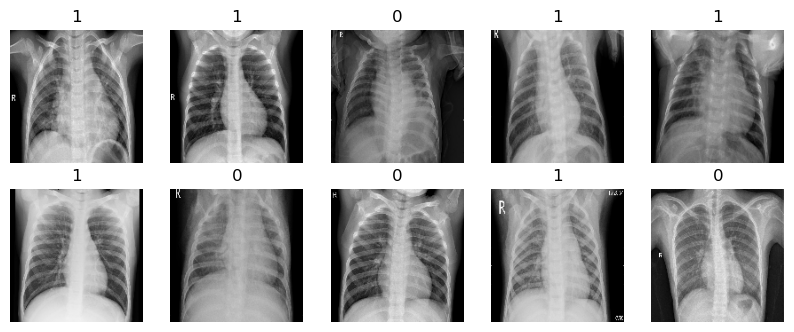

In [24]:
show_image_batch(X_test[:20], y_test[:20])

In [ ]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

##Thực hiện huấn luyện bằng mô hình tensorflow

### Huấn luyện theo mô hình AlexNet

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, MaxPool2D, Conv2D, Flatten
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(filters=64, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
    Flatten(),
    Dense(units=1024, activation='relu'),
    Dropout(0.2),
    Dense(units=512, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 35, 35, 32)          │          11,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 35, 35, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 17, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 17, 17, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 17, 17, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1024)                │       1,180,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             5

 Total params: 2,139,841 (8.16 MB)

 Trainable params: 2,138,881 (8.16 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
count_pneumonia = y_train.sum()
count_normal = len(y_train) - count_pneumonia
total = len(y_train)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

####Thử với class_weight nhưng bị Underfiting

In [ ]:
class_weights = {
    0: count_pneumonia / count_normal,
    1: 1.0
}

In [ ]:
with tf.device('/device:GPU:0'):
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val),class_weight=class_weights)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.4954 - loss: 1.9719 - val_accuracy: 0.4375 - val_loss: 0.6961
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5218 - loss: 1.0775 - val_accuracy: 0.6250 - val_loss: 0.6853
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5321 - loss: 1.0340 - val_accuracy: 0.5000 - val_loss: 0.7136
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4612 - loss: 1.0480 - val_accuracy: 0.5000 - val_loss: 0.7151
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4859 - loss: 1.0528 - val_accuracy: 0.5000 - val_loss: 0.7140
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5036 - loss: 1.0538 - val_accuracy: 0.5625 - val_loss: 0.6954
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5088 - loss: 1.0376 - val_accuracy: 0.5000 - val_loss: 0.7048
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5067 - loss: 1.0364 - val_acc

####Thử với SMOTE dữ liệu bị Underfitting

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
# Reshape X_train to 2D before applying SMOTE
X_train_2d = X_train.reshape(X_train.shape[0], -1)

# Apply SMOTE to the reshaped data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_2d, y_train)

# Reshape the resampled data back to the original 4D shape
X_resampled = X_resampled.reshape(X_resampled.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3])

# Now you can use X_resampled and y_resampled for training your model

In [ ]:
with tf.device('/device:GPU:0'):
    history = model.fit(X_resampled, y_resampled, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.5294 - loss: 1.1055 - val_accuracy: 0.5000 - val_loss: 0.7836
Epoch 2/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5900 - loss: 0.6857 - val_accuracy: 0.5000 - val_loss: 2.6931
Epoch 3/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5804 - loss: 0.6869 - val_accuracy: 0.5000 - val_loss: 2.8180
Epoch 4/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6697 - loss: 0.6115 - val_accuracy: 0.5000 - val_loss: 1.6861
Epoch 5/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6592 - loss: 0.6104 - val_accuracy: 0.5000 - val_loss: 4.1377
Epoch 6/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6571 - loss: 0.6111 - val_accuracy: 0.5000 - val_loss: 3.0540
Epoch 7/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6756 - loss: 0.5870 - val_accuracy: 0.5000 - val_loss: 0.8525
Epoch 8/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7125 - loss: 0.5691 - val_acc

####Dùng mạng thích chập ResNet50

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Kích thước đầu vào của hình ảnh
input_shape = (224, 224, 3)

# 1. ResNet50
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze các layer của ResNet50
for layer in resnet_base.layers:
    layer.trainable = False

# Tạo mô hình ResNet50
resnet_model = Sequential([
    resnet_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

resnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])




In [ ]:
resnet_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,278,337 (187.98 MB)

 Trainable params: 25,690,625 (98.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.01,
    zoom_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Giả sử bạn có sẵn các thư mục train và validation
train_dir = '/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/train'
val_dir = '/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/val'


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
with tf.device('/device:GPU:0'):
    history_resnet = resnet_model.fit(
      train_generator,
      validation_data=val_generator,
      epochs=10,
      steps_per_epoch=train_generator.samples // train_generator.batch_size,
      validation_steps=val_generator.samples // val_generator.batch_size
  )

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.6851 - loss: 2.3798

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 1507s 9s/step - accuracy: 0.6853 - loss: 2.3714 - val_accuracy: 0.5000 - val_loss: 0.7507
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 123s 754ms/step - accuracy: 0.7427 - loss: 0.5119 - val_accuracy: 0.5000 - val_loss: 0.7245
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 139s 735ms/step - accuracy: 0.7379 - loss: 0.5135 - val_accuracy: 0.5000 - val_loss: 0.6152
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 733ms/step - accuracy: 0.7410 - loss: 0.4766 - val_accuracy: 0.5000 - val_loss: 0.6756
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 120s 738ms/step - accuracy: 0.7463 - loss: 0.4683 - val_accuracy: 0.5000 - val_loss: 0.7866
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 743ms/step - accuracy: 0.7427 - loss: 0.4679 - val_accuracy: 0.5000 - val_loss: 1.0379
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 734ms/step - accuracy: 0.7392 - loss: 0.5092 - val_accuracy: 0.5000 - val_loss: 0.7887
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 733ms/step - accuracy: 0.7418 - loss: 0.5060

In [ ]:
test_dir = '/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/test'

In [ ]:
test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 624 images belonging to 2 classes.


In [ ]:
y_red = resnet_model.predict(test_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 152s 8s/step


In [ ]:
test_loss_resnet, test_accuracy_resnet = resnet_model.evaluate(test_generator)
print(f"ResNet50 Test Loss: {test_loss_resnet}, Test Accuracy: {test_accuracy_resnet}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 448ms/step - accuracy: 0.2984 - loss: 0.8297
ResNet50 Test Loss: 0.5202682614326477, Test Accuracy: 0.625


In [ ]:
predictions_resnet = [1 if p > 0.5 else 0 for p in y_pred]
print("Predictions ResNet50:", predictions_resnet)

Predictions ResNet50: [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


####Lưu và xem set mô hình

In [ ]:
model.save("Pneumonia_best.h5")

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3696 - loss: 4.4655
Test loss: 4.5019
Test accuracy: 0.3750


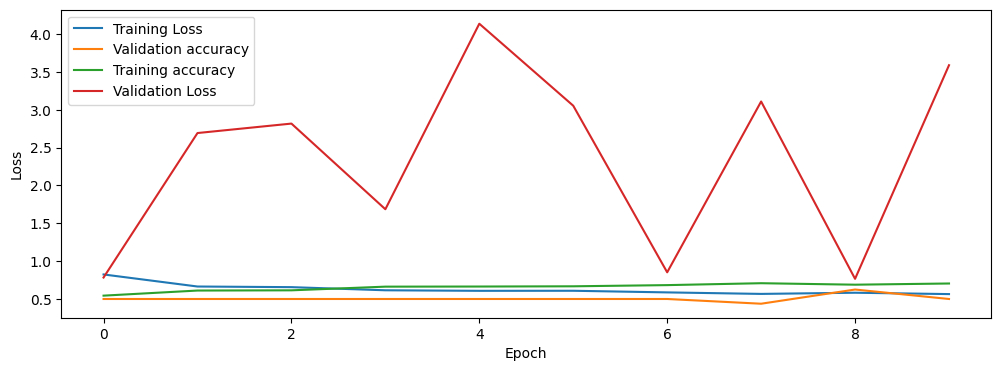

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test[0:20])
y_pred = (y_pred > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


<ipython-input-29-2f98a1706404>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(int(label_batch[n]))


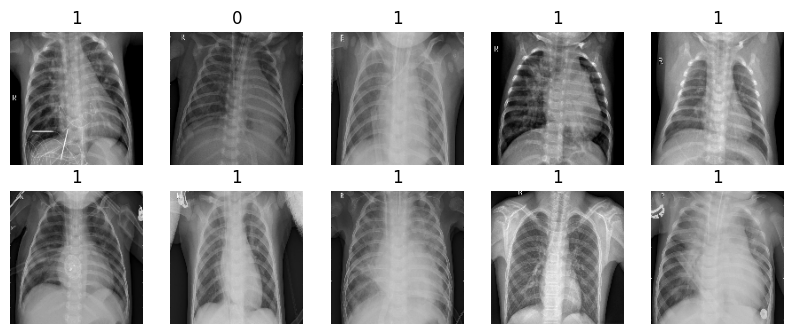

In [ ]:
show_image_batch(X_test[:20], y_pred)

<ipython-input-29-2f98a1706404>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(int(label_batch[n]))


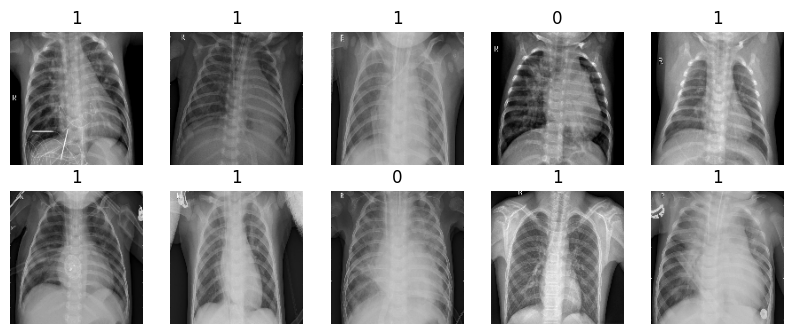

In [ ]:
show_image_batch(X_test[0:20], y_test[0:20])

Code chạy ổn
accuracy training là > 0.9 và accuracy val là 0.8

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Đường dẫn đến tập dữ liệu
train_dir = "/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/train"
test_dir = "/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/test"
val_dir = "/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/val"

# Kích thước ảnh và batch size
img_width, img_height = 150, 150
batch_size = 32

# Data Augmentation và tiền xử lý dữ liệu
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Xây dựng mô hình CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile mô hình
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Huấn luyện mô hình
with tf.device('/device:GPU:0'):
    history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size,
      validation_data=val_generator,
      validation_steps=val_generator.samples // batch_size,
      epochs=30,
      callbacks=[checkpoint, early_stopping]
  )

# Đánh giá mô hình trên tập test
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test accuracy: {test_acc:.4f}')

# Lưu mô hình
model.save('pneumonia_detection_model.h5')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7315 - loss: 0.5723

163/163 ━━━━━━━━━━━━━━━━━━━━ 500s 3s/step - accuracy: 0.7317 - loss: 0.5720 - val_accuracy: 0.6250 - val_loss: 0.6785
Epoch 2/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.8425 - loss: 0.3414

163/163 ━━━━━━━━━━━━━━━━━━━━ 88s 536ms/step - accuracy: 0.8426 - loss: 0.3412 - val_accuracy: 0.7500 - val_loss: 0.4785
Epoch 3/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 86s 528ms/step - accuracy: 0.8637 - loss: 0.3040 - val_accuracy: 0.6250 - val_loss: 0.9456
Epoch 4/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 139s 514ms/step - accuracy: 0.8714 - loss: 0.2826 - val_accuracy: 0.7500 - val_loss: 0.4674
Epoch 5/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 515ms/step - accuracy: 0.8821 - loss: 0.2554 - val_accuracy: 0.6250 - val_loss: 0.9436
Epoch 6/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.8902 - loss: 0.2523

163/163 ━━━━━━━━━━━━━━━━━━━━ 87s 534ms/step - accuracy: 0.8903 - loss: 0.2522 - val_accuracy: 0.8125 - val_loss: 0.6709
Epoch 7/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 524ms/step - accuracy: 0.9099 - loss: 0.2320 - val_accuracy: 0.5625 - val_loss: 1.4099
Epoch 8/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 85s 522ms/step - accuracy: 0.8983 - loss: 0.2339 - val_accuracy: 0.7500 - val_loss: 0.5921
Epoch 9/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 528ms/step - accuracy: 0.9115 - loss: 0.2122 - val_accuracy: 0.8125 - val_loss: 0.4996
Found 624 images belonging to 2 classes.
19/19 ━━━━━━━━━━━━━━━━━━━━ 100s 5s/step - accuracy: 0.8008 - loss: 0.4275


Test accuracy: 0.7862


In [ ]:
def show_image_batch(image_batch, label_batch):
    plt.figure(figsize=(10, 10))
    for n in range(len(image_batch)):
        ax = plt.subplot(5, 5, n + 1)
        plt.imshow(image_batch[n].astype('uint8'))
        plt.title(int(label_batch[n]))
        plt.axis("off")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


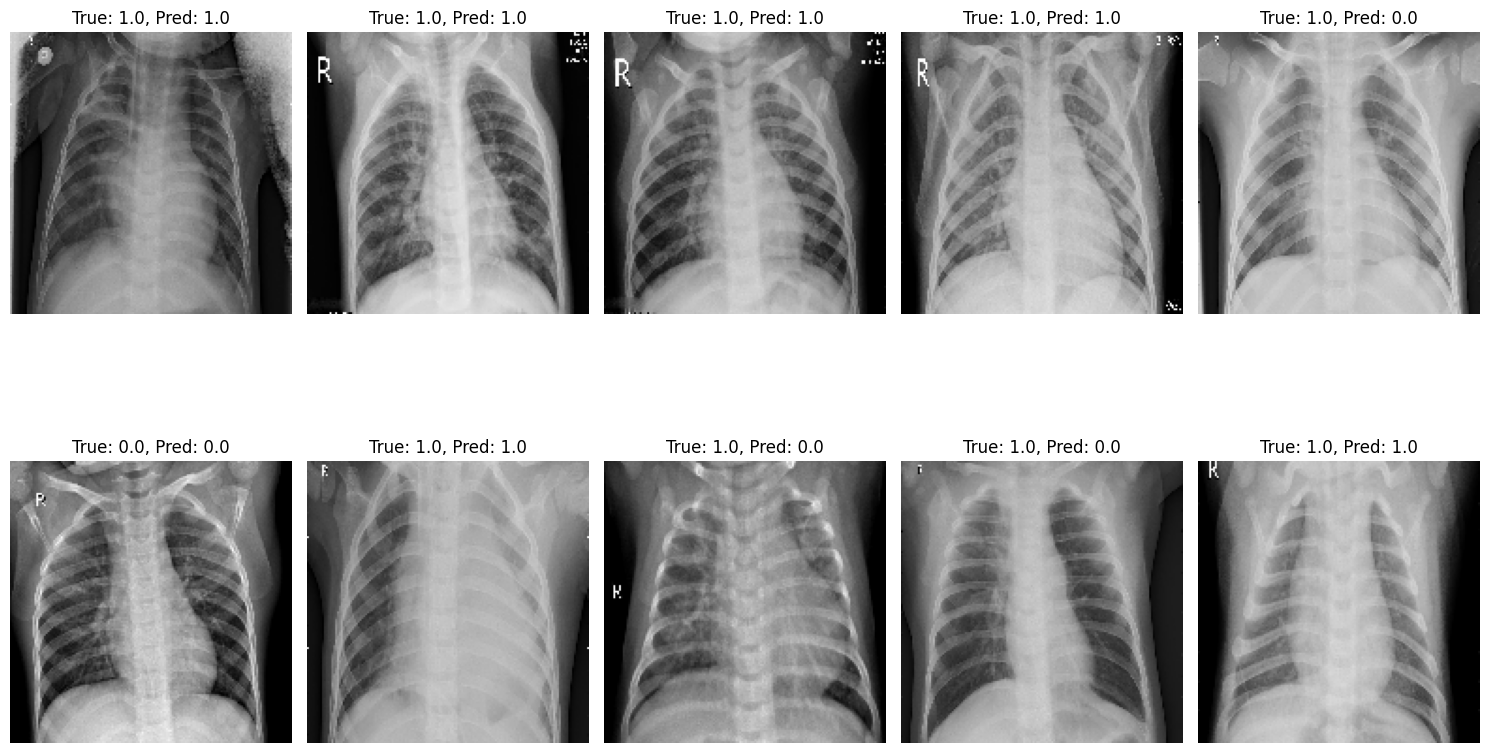

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

test_images, test_labels = next(test_generator)
test_images = test_images[:10]
test_labels = test_labels[:10]

predictions = model.predict(test_images)
predictions = np.round(predictions).flatten()


plt.figure(figsize=(15, 10))
for i in range(len(test_images)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"True: {test_labels[i]}, Pred: {predictions[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_images, test_labels = [], []
for _ in range(len(test_generator)):
    images, labels = next(test_generator)
    test_images.extend(images)
    test_labels.extend(labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)


In [ ]:
predictions = model.predict(test_images)
predictions = np.round(predictions).flatten()

cm = confusion_matrix(test_labels, predictions)

TN, FP, FN, TP = cm.ravel()

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [ ]:
print(f"True Positive (TP): {TP}")
print(f"False Negative (FN): {FN}")
print(f"False Positive (FP): {FP}")
print(f"True Negative (TN): {TN}")

True Positive (TP): 271
False Negative (FN): 124
False Positive (FP): 9
True Negative (TN): 220


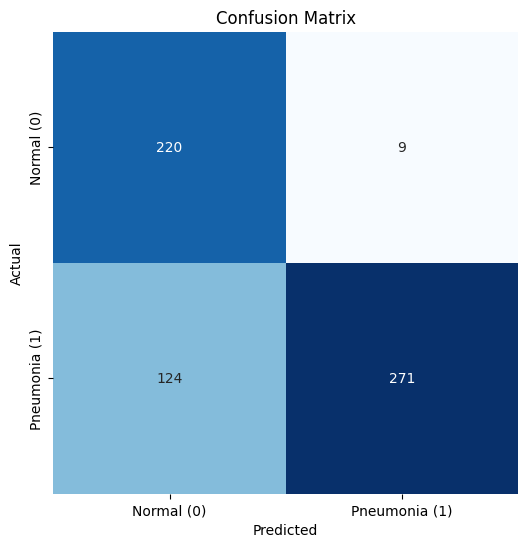

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal (0)', 'Pneumonia (1)'],
            yticklabels=['Normal (0)', 'Pneumonia (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()